## 퍼셉트론 (Perceptron)

### 단층 퍼셉트론 만들어보기


#### AND gate
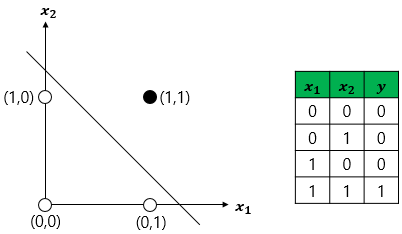

In [ ]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

#### OR gate
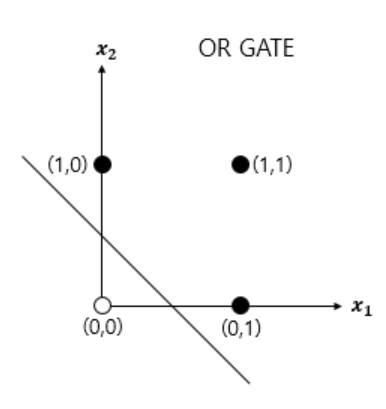
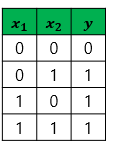

In [ ]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

#### OR gate 단층 퍼셉트론

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#데이터 로드
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [1]])

# 퍼셉트론 설정
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid)

# 비용함수와 옵티마이저 정의
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(1001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ')
    print(hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ')
    print(predicted.detach().cpu().numpy())
    print('실제값(Y): ')
    print(Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

#### XOR gate 단층 퍼셉트론
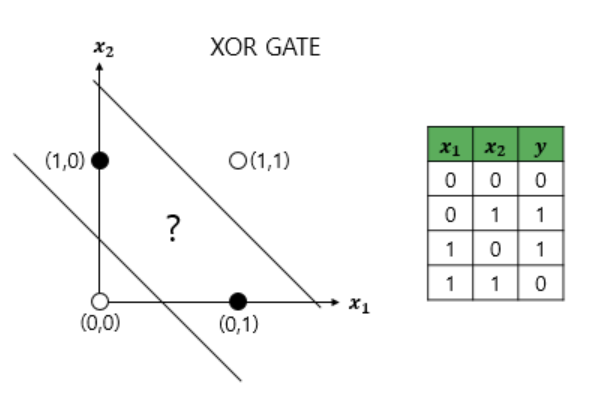

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

print(device)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#데이터 로드
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# 퍼셉트론 설정
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

# 비용함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ')
    print(hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ')
    print(predicted.detach().cpu().numpy())
    print('실제값(Y): ')
    print(Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

### 다층 퍼셉트론 만들어보기

#### XOR gate 구현하기
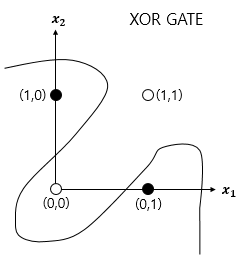

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# 데이터 로딩
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

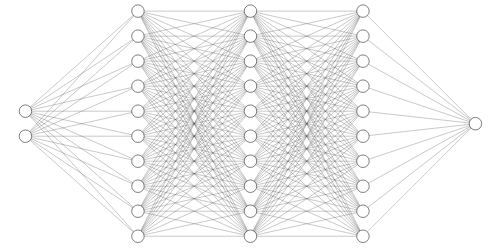

In [ ]:
# 퍼셉트론 설정
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

In [ ]:
# 비용함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ')
    print(hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ')
    print(predicted.detach().cpu().numpy())
    print('실제값(Y): ')
    print(Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

### 다층 퍼셉트론 눈으로 확인해보기
https://playground.tensorflow.org/

## 다층 퍼셉트론으로 MNIST 분류하기

### 데이터 처리

#### 데이터 로딩

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml

In [ ]:
# 데이터 로딩
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.data[0]

In [ ]:
# 실제값
mnist.target[0]

#### 데이터 형변환

In [ ]:
# 데이터 입력
mnist.target = mnist.target.astype(np.int8)
X = mnist.data / 255  # 0-255값을 [0,1] 구간으로 정규화
y = mnist.target

print(X[0])
print(y[0])

#### 데이터 가시화

In [ ]:
# 데이터 가시화
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 레이블은 {:.0f}이다".format(y[0]))

#### Train / Test 데이터셋 분리

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

print(len(X))
print(X_train.size())
print(X_test.size())

### 학습 세팅

#### 모델 정의

In [ ]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

#### 오차함수와 최적화 기법

In [ ]:
from torch import optim

# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

#### 학습 함수 정의

In [ ]:
def train(epoch):
    model.train()  # 신경망을 학습 모드로 전환

    # 데이터로더에서 미니배치를 하나씩 꺼내 학습을 수행
    for data, targets in loader_train:

        optimizer.zero_grad()  # 경사를 0으로 초기화
        outputs = model(data)  # 데이터를 입력하고 출력을 계산
        loss = loss_fn(outputs, targets)  # 출력과 훈련 데이터 정답 간의 오차를 계산
        loss.backward()  # 오차를 역전파 계산
        optimizer.step()  # 역전파 계산한 값으로 가중치를 수정

    print("epoch{}：완료\n".format(epoch))

#### 테스트 함수 정의

In [ ]:
def test():
    model.eval()  # 신경망을 추론 모드로 전환
    correct = 0

    # 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
    with torch.no_grad():  # 추론 과정에는 미분이 필요없음
        for data, targets in loader_test:

            outputs = model(data)  # 데이터를 입력하고 출력을 계산

            # 추론 계산
            _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
            correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

    # 정확도 출력
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

### 학습 해보기

#### 학습 없음 (초기 파라미터로)

In [ ]:
test()

#### 3회 학습

In [ ]:
for epoch in range(3):
    train(epoch)

test()

#### 7회 추가 학습

In [ ]:
for epoch in range(7):
    train(epoch)

test()

#### 데이터 확인

In [ ]:
index = 2024 # 바꿔가며 확인해보기

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))